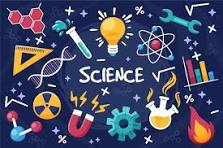

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Goal of  Project :
</p>
</div>



In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:


import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

# basic understanding of data

# preview of the data

In [6]:
df=pd.read_csv("C:\\Users\\aman0\\Downloads\\data sets-20240328T070554Z-001\\data sets\\supermarket_sales - Sheet1.csv")

In [7]:
df.sample(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.300,804.300,1/24/2019,18:10,Ewallet,766.00,4.761905,38.300,6.0
568,241-11-2261,B,Mandalay,Normal,Female,Fashion accessories,79.86,7,27.951,586.971,1/10/2019,10:33,Credit card,559.02,4.761905,27.951,5.5
93,152-08-9985,B,Mandalay,Member,Male,Health and beauty,64.36,9,28.962,608.202,3/12/2019,12:09,Credit card,579.24,4.761905,28.962,8.6


# how big is the data


In [8]:

df.shape



(1000, 17)

# 1000 rows 17 columns

# fetching the colums name

In [11]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

##### - Column Description

- Invoice id: Computer generated sales slip invoice identification number

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $

- Quantity: Number of products purchased by customer

- Tax: 5% tax fee for customer buying

- Total: Total price including tax

- Date: Date of purchase (Record available from January 2019 to March 2019)

- Time: Purchase time (10am to 9pm)

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- COGS: Cost of goods sold

- Gross margin percentage: Gross margin percentage
- Gross income: Gross income

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)




# basic information of data

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# observation: date and time needs to be changed to date time

# 4 preprocessing

In [109]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [110]:
df.isnull().sum().to_frame().T

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
df.isnull().sum().to_frame().rename(columns={0:"missing value count"}).T

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
missing value count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
df.isnull().sum().to_frame().rename(columns={0:"missing value count"})

,missing value count
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


# checking the inconsistency

In [113]:
df_obj= df.select_dtypes(include="object")

In [114]:
df_obj

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet
...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,1/29/2019,13:46,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,3/2/2019,17:16,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,2/9/2019,13:22,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,2/22/2019,15:33,Cash


In [115]:
for i in df_obj.columns[1:]:
    print(i, "------------------", df[i].unique(),"has ",df[i].nunique(),"unique value","\n\n")

Branch ------------------ ['A' 'C' 'B'] has  3 unique value 


City ------------------ ['Yangon' 'Naypyitaw' 'Mandalay'] has  3 unique value 


Customer type ------------------ ['Member' 'Normal'] has  2 unique value 


Gender ------------------ ['Female' 'Male'] has  2 unique value 


Product line ------------------ ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories'] has  6 unique value 


Date ------------------ ['1/5/2019' '3/8/2019' '3/3/2019' '1/27/2019' '2/8/2019' '3/25/2019'
 '2/25/2019' '2/24/2019' '1/10/2019' '2/20/2019' '2/6/2019' '3/9/2019'
 '2/12/2019' '2/7/2019' '3/29/2019' '1/15/2019' '3/11/2019' '1/1/2019'
 '1/21/2019' '3/5/2019' '3/15/2019' '2/17/2019' '3/2/2019' '3/22/2019'
 '3/10/2019' '1/25/2019' '1/28/2019' '1/7/2019' '3/23/2019' '1/17/2019'
 '2/2/2019' '3/4/2019' '3/16/2019' '2/27/2019' '2/10/2019' '3/19/2019'
 '2/3/2019' '3/7/2019' '2/28/2019' '3/27/2019' '1/20/2019' '3/12/2019'
 '2/15

In [116]:
df_numeric= df.select_dtypes(exclude="object")
df_numeric

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [117]:
for i in df_numeric:
    print(i, "------------------", df[i].unique(),"has ",df[i].nunique(),"unique value","\n\n")

Unit price ------------------ [74.69 15.28 46.33 58.22 86.31 85.39 68.84 73.56 36.26 54.84 14.48 25.51
 46.95 43.19 71.38 93.72 68.93 72.61 54.67 40.3  86.04 87.98 33.2  34.56
 88.63 52.59 33.52 87.67 88.36 24.89 94.13 78.07 83.78 96.58 99.42 68.12
 62.62 60.88 54.92 30.12 86.72 56.11 69.12 98.7  15.37 93.96 56.69 20.01
 18.93 82.63 91.4  44.59 17.87 15.43 16.16 85.98 44.34 89.6  72.35 30.61
 24.74 55.73 55.07 15.81 75.74 15.87 33.47 97.61 78.77 18.33 89.48 62.12
 48.52 75.91 74.67 41.65 49.04 78.31 20.38 99.19 96.68 19.25 80.36 48.91
 83.06 76.52 49.38 42.47 76.99 47.38 44.86 21.98 64.36 89.75 97.16 87.87
 12.45 52.75 82.7  48.71 78.55 23.07 58.26 30.35 88.67 27.38 62.13 33.98
 81.97 16.49 98.21 72.84 58.07 80.79 27.02 21.94 51.36 10.96 53.44 99.56
 57.12 99.96 63.91 56.47 93.69 32.25 31.73 68.54 90.28 39.62 92.13 34.84
 87.45 81.3  90.22 26.31 34.42 51.91 72.5  89.8  90.5  68.6  30.41 77.95
 46.26 30.14 66.14 71.86 32.46 91.54 83.24 16.48 80.97 92.29 72.17 50.28
 97.22 93.39 43.18 63

In [118]:
df_numeric= df.select_dtypes(exclude="object")

In [119]:
for col in df_numeric:
    for i in df[col]:
        if i<=0:
            print("invalid")

# no value found to be  less than zero

# detecting the duplicacy

In [120]:
df.duplicated().sum()

0

# feature engineering

In [121]:
df["Date"]=pd.to_datetime(df["Date"])
df["Time"]=pd.to_datetime(df["Time"])



C:\Users\aman0\AppData\Local\Temp\ipykernel_584\292217589.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"]=pd.to_datetime(df["Time"])


In [122]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [123]:
from datetime import datetime as dt

In [124]:
df["month"]=df.Date.dt.month_name()
df["day_name"]=df.Date.dt.day_name()
df["day"]=df.Date.dt.day
df["year"]=df.Date.dt.year
df["Hour"]=df.Time.dt.hour




In [125]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,month,day_name,day,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,January,Saturday,5,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,March,Friday,8,2019,10


# since we are deleting the invoice id as it seems irrelevant as we are deleting branch as each city maps single branch

###  mandalay[b]
naypyitaw[c]
yangon[a]

In [28]:
df.drop(columns=['Invoice ID','Branch'], inplace=True)


In [29]:
df.describe(include=["int","float"]).T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000
day,1000.0,15.256000,8.693563e+00,1.000000,8.000000,15.000000,23.000000,31.000000
year,1000.0,2019.000000,0.000000e+00,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000


In [30]:
cols=df.describe(include=["int","float"]).T[:-3].index
cols

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [31]:
df.describe(include=["int","float"]).T[:-3]

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


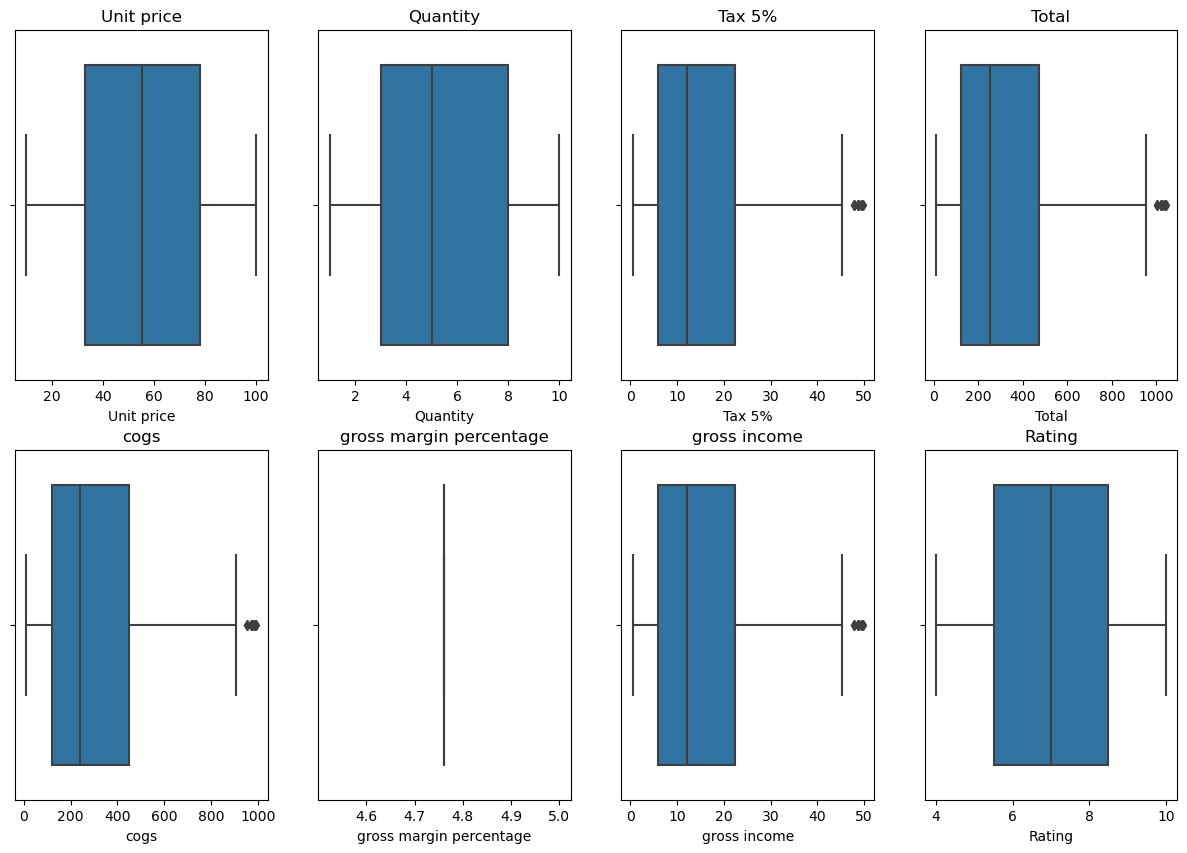

In [32]:
pos=1
plt.figure(figsize=(15,10))
for col in cols:
    plt.subplot(2,4,pos)
    sns.boxplot(x=col,data=df)
    plt.title(col)
    pos=pos+1

<Axes: >

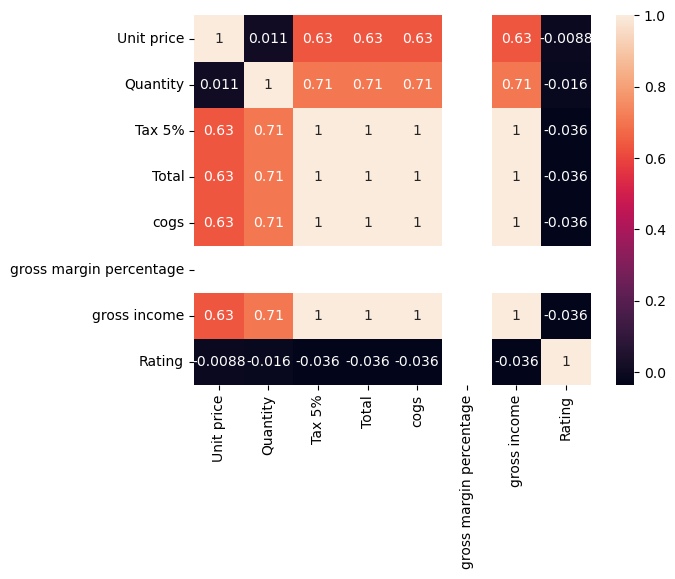

In [33]:
sns.heatmap(df_numeric.corr(),annot=True)

In [34]:
df.drop(columns=["cogs","gross income","Tax 5%","gross margin percentage"], inplace= True)

In [35]:
df

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating,month,day_name,day,year,Hour
0,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,2024-05-06 13:08:00,Ewallet,9.1,January,Saturday,5,2019,0
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,2024-05-06 10:29:00,Cash,9.6,March,Friday,8,2019,0
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,2024-05-06 13:23:00,Credit card,7.4,March,Sunday,3,2019,0
3,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,2024-05-06 20:33:00,Ewallet,8.4,January,Sunday,27,2019,0
4,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,2024-05-06 10:37:00,Ewallet,5.3,February,Friday,8,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,2019-01-29,2024-05-06 13:46:00,Ewallet,6.2,January,Tuesday,29,2019,0
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.4900,2019-03-02,2024-05-06 17:16:00,Ewallet,4.4,March,Saturday,2,2019,0
997,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,2019-02-09,2024-05-06 13:22:00,Cash,7.7,February,Saturday,9,2019,0
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,2019-02-22,2024-05-06 15:33:00,Cash,4.1,February,Friday,22,2019,0


# total and average sale of the company

In [36]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating,month,day_name,day,year,Hour
0,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,2024-05-06 13:08:00,Ewallet,9.1,January,Saturday,5,2019,0
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,2024-05-06 10:29:00,Cash,9.6,March,Friday,8,2019,0
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,2024-05-06 13:23:00,Credit card,7.4,March,Sunday,3,2019,0
3,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,2024-05-06 20:33:00,Ewallet,8.4,January,Sunday,27,2019,0
4,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,2024-05-06 10:37:00,Ewallet,5.3,February,Friday,8,2019,0


In [37]:
df["Total"].agg(["mean","sum"])

mean       322.966749
sum     322966.749000
Name: Total, dtype: float64

# since some product are expensive means that they are considerwd as outliers so we find median since the above avg sale does give the genuine insight

In [38]:
df["Total"].median()

253.848

In [39]:
df["Total"].agg(["mean","sum"])

mean       322.966749
sum     322966.749000
Name: Total, dtype: float64

C:\Users\aman0\AppData\Local\Temp\ipykernel_584\643399360.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Total"])


Text(0.5, 1.0, 'outliers detection analysis')

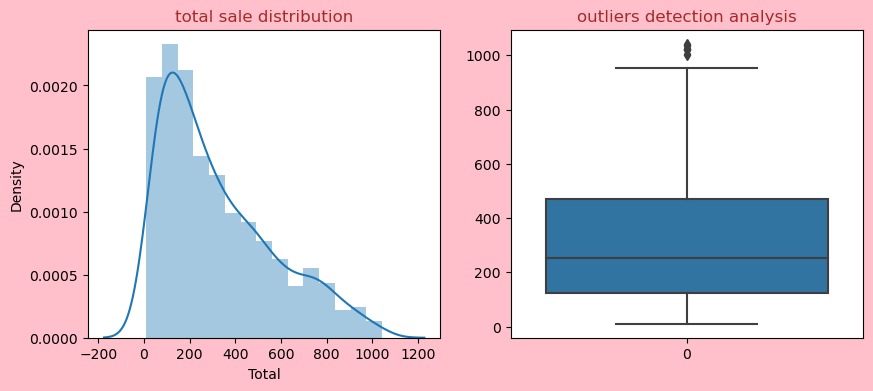

In [40]:
plt.figure(figsize=(10,4),facecolor="pink")
plt.subplot(1,2,1)
sns.distplot(df["Total"])
plt.title("total sale distribution",color="brown",fontsize=12)
plt.subplot(1,2,2)
sns.boxplot(df["Total"])
plt.title("outliers detection analysis",fontsize=12, color="brown")

# which city is found to be a overcrouded place

Text(0.5, 1.0, 'crowded city')

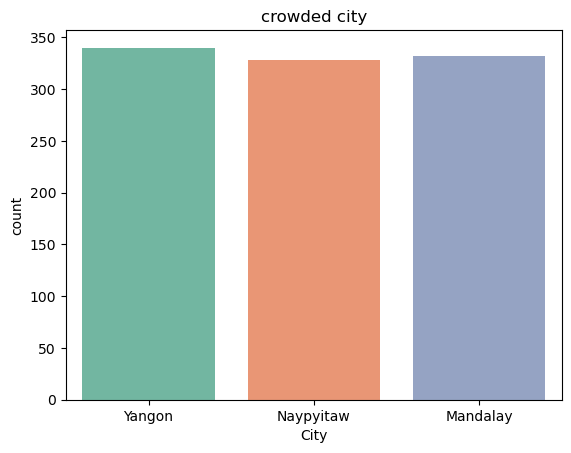

In [41]:
sns.countplot(x="City",data=df,palette="Set2")
plt.title("crowded city")

# total sale and average sale of each city

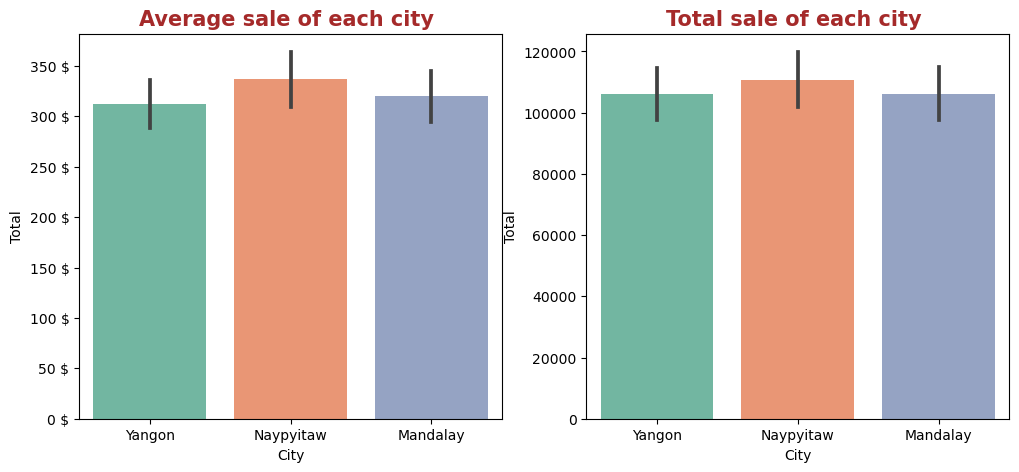

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x="City",y="Total",data=df,palette="Set2")
plt.yticks([0,50,100,150,200,250,300,350],["0 $","50 $","100 $","150 $","200 $","250 $","300 $","350 $"])
plt.title("Average sale of each city ",fontsize=15,color="brown",fontweight="bold")
plt.subplot(1,2,2)
sns.barplot(x="City",y="Total",data=df,estimator=sum,palette="Set2")
plt.title("Total sale of each city ",fontsize=15,color="brown",fontweight="bold");




In [43]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating,month,day_name,day,year,Hour
0,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,2024-05-06 13:08:00,Ewallet,9.1,January,Saturday,5,2019,0
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,2024-05-06 10:29:00,Cash,9.6,March,Friday,8,2019,0
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,2024-05-06 13:23:00,Credit card,7.4,March,Sunday,3,2019,0
3,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,2024-05-06 20:33:00,Ewallet,8.4,January,Sunday,27,2019,0
4,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,2024-05-06 10:37:00,Ewallet,5.3,February,Friday,8,2019,0


# since naypyitaw is th hot selling city so we find the detail of naypyitaw on any day or highest selling 

In [44]:
df_n=df[df["City"]=="Naypyitaw"]
df_n[df_n["Total"]==df_n["Total"].max()]




,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating,month,day_name,day,year,Hour
350,Naypyitaw,Member,Female,Fashion accessories,99.3,10,1042.65,2019-02-15,2024-05-06 14:53:00,Credit card,6.6,February,Friday,15,2019,0


# lowest sale

In [45]:
df_n=df[df["City"]=="Naypyitaw"]
df_n[df_n["Total"]==df_n["Total"].min()]

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating,month,day_name,day,year,Hour
822,Naypyitaw,Member,Male,Sports and travel,10.17,1,10.6785,2019-02-07,2024-05-06 14:15:00,Cash,5.9,February,Thursday,7,2019,0


# root cause analysis of hot selling city

## costumer type

<Axes: xlabel='City', ylabel='count'>

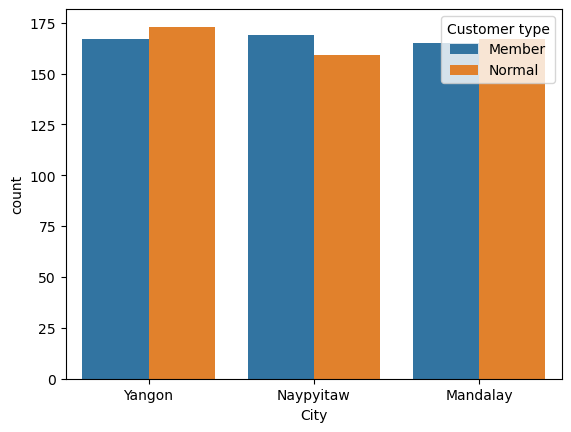

In [46]:
sns.countplot(x="City",data=df,hue="Customer type")

# rating

<Axes: xlabel='City', ylabel='Rating'>

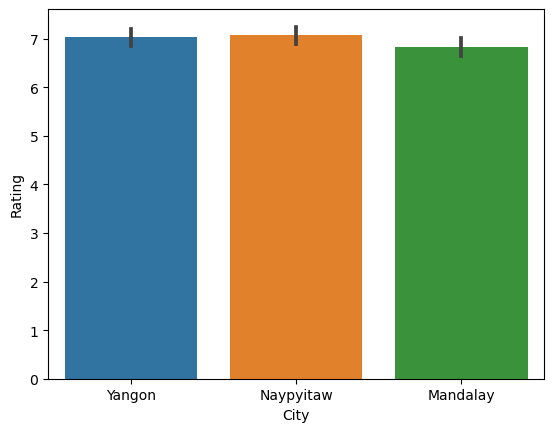

In [47]:
sns.barplot(x="City",y="Rating",data=df)

# PRODUCT LINE

In [48]:
df.groupby(["City"])["Product line"].value_counts()

City       Product line          
Mandalay   Sports and travel         62
           Fashion accessories       62
           Electronic accessories    55
           Health and beauty         53
           Home and lifestyle        50
           Food and beverages        50
Naypyitaw  Food and beverages        66
           Fashion accessories       65
           Electronic accessories    55
           Health and beauty         52
           Home and lifestyle        45
           Sports and travel         45
Yangon     Home and lifestyle        65
           Electronic accessories    60
           Sports and travel         59
           Food and beverages        58
           Fashion accessories       51
           Health and beauty         47
Name: count, dtype: int64

# sale trend of the company over the 3 months

C:\Users\aman0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\aman0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

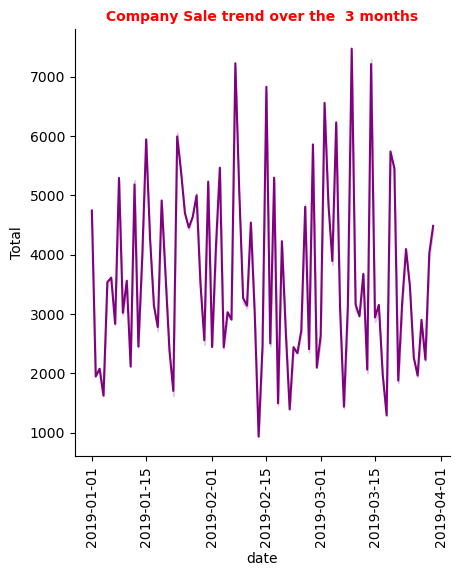

In [49]:
plt.figure(figsize=(15,5))
sns.relplot(x="Date",y="Total",data=df,kind="line",color="purple",estimator=sum,ci=False)
plt.xlabel("date")
plt.title(" Company Sale trend over the  3 months ",fontsize=10,color="red",fontweight="bold")
plt.xticks(rotation=90);


# sale trend of each super market cityu

In [50]:
df_n=df[df["City"]=="Naypyitaw"]
df_y=df[df["City"]=="Yangon"]
df_m=df[df["City"]=="Mandalay"]


In [51]:
df_m

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating,month,day_name,day,year,Hour
9,Mandalay,Member,Female,Food and beverages,54.84,3,172.746,2019-02-20,2024-05-06 13:27:00,Credit card,5.9,February,Wednesday,20,2019,0
10,Mandalay,Member,Female,Fashion accessories,14.48,4,60.816,2019-02-06,2024-05-06 18:07:00,Ewallet,4.5,February,Wednesday,6,2019,0
11,Mandalay,Member,Male,Electronic accessories,25.51,4,107.142,2019-03-09,2024-05-06 17:03:00,Cash,6.8,March,Saturday,9,2019,0
15,Mandalay,Member,Female,Sports and travel,93.72,6,590.436,2019-01-15,2024-05-06 16:19:00,Cash,4.5,January,Tuesday,15,2019,0
19,Mandalay,Normal,Female,Home and lifestyle,40.30,2,84.630,2019-03-11,2024-05-06 15:30:00,Ewallet,4.4,March,Monday,11,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,Mandalay,Member,Male,Health and beauty,62.00,8,520.800,2019-01-03,2024-05-06 19:08:00,Credit card,6.2,January,Thursday,3,2019,0
989,Mandalay,Member,Male,Health and beauty,75.37,8,633.108,2019-01-28,2024-05-06 15:46:00,Credit card,8.4,January,Monday,28,2019,0
991,Mandalay,Normal,Female,Sports and travel,76.60,10,804.300,2019-01-24,2024-05-06 18:10:00,Ewallet,6.0,January,Thursday,24,2019,0
993,Mandalay,Normal,Male,Fashion accessories,17.49,10,183.645,2019-02-22,2024-05-06 18:35:00,Ewallet,6.6,February,Friday,22,2019,0


In [52]:
cities=[df_n,df_y,df_m]

C:\Users\aman0\AppData\Local\Temp\ipykernel_584\1616409003.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False)
C:\Users\aman0\AppData\Local\Temp\ipykernel_584\1616409003.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False)
C:\Users\aman0\AppData\Local\Temp\ipykernel_584\1616409003.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False)


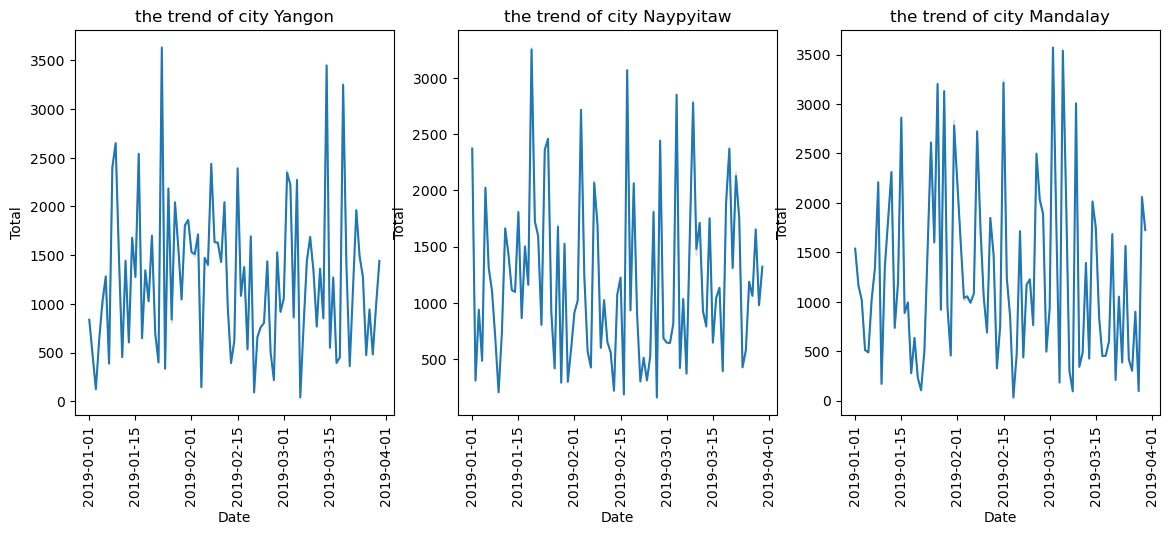

In [53]:
city_name=["Yangon", 'Naypyitaw', 'Mandalay']
pos=1
plt.figure(figsize=(14,5))
for city in cities:
    #print(city)
    plt.subplot(1,3,pos)
    sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False)
    plt.title(f"the trend of city {city_name[pos-1]}")
    plt.xticks(rotation=90)
    pos=pos+1
    


# find the highest business revenue month of the company.


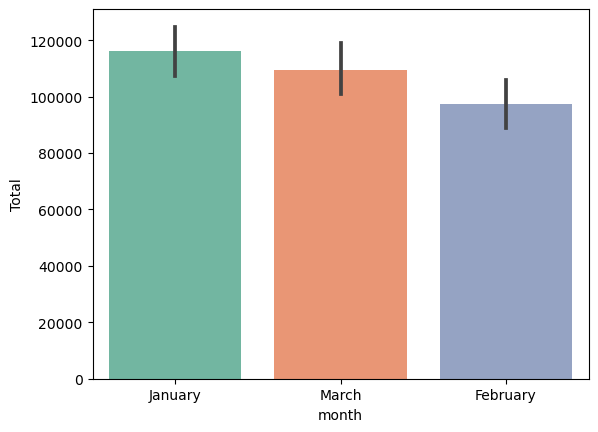

In [54]:
sns.barplot(x="month",y="Total",data=df,estimator=sum,palette="Set2");


# % BUSINESS REVENUE IN % OF EACH MONTH

In [55]:
df.groupby(["month"])["Total"].agg(["sum"])


,sum
month,
February,97219.374
January,116291.868
March,109455.507


Text(0.5, 1.0, 'Hot selling Month of the company ')

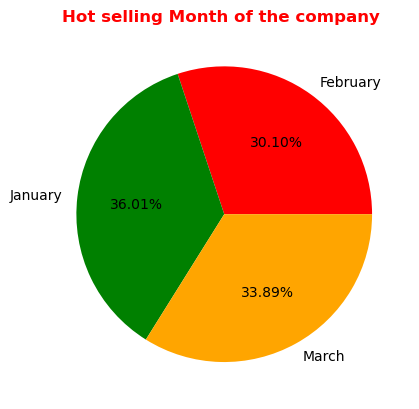

In [56]:
plt.pie(df.groupby(["month"])["Total"].agg(["sum"])["sum"],labels=df.groupby(["month"])["Total"].agg(["sum"]).index,autopct="%.2f%%",colors=["red","green","orange"])
plt.title("Hot selling Month of the company ",fontsize=12,color="Red",fontweight="bold")




# find the highest business revenue month of each city and also sales pattern

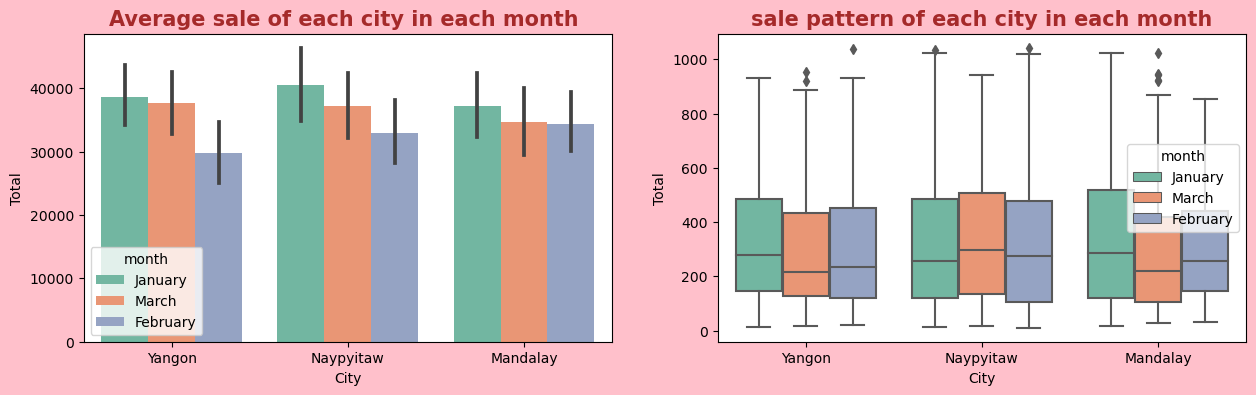

In [57]:
plt.figure(figsize=(15,4),facecolor="pink")
plt.subplot(1,2,1)
sns.barplot(x="City",y="Total",data=df,estimator=sum,palette="Set2",hue="month");
plt.title("Average sale of each city in each month ",fontsize=15,color="brown",fontweight="bold")
plt.subplot(1,2,2)
sns.boxplot(x="City",y="Total",data=df,palette="Set2",hue="month");
plt.title("sale pattern of each city in each month",fontsize=15,color="brown",fontweight="bold");






# costumer visiting trend of each city each month
# hot selling day of the company
# hot selling day of each city
# find the total week day and weekend sale of the company
# find the total week day and weekend sale of each city
# total week weeknd sale of ech city in each month
# find the most populated product of the company and city
# find the most revenue generating priduct of the company

# 1 costumer visiting trend of each city each month¶

C:\Users\aman0\AppData\Local\Temp\ipykernel_584\3044219371.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False,hue="month")
C:\Users\aman0\AppData\Local\Temp\ipykernel_584\3044219371.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False,hue="month")
C:\Users\aman0\AppData\Local\Temp\ipykernel_584\3044219371.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False,hue="month")


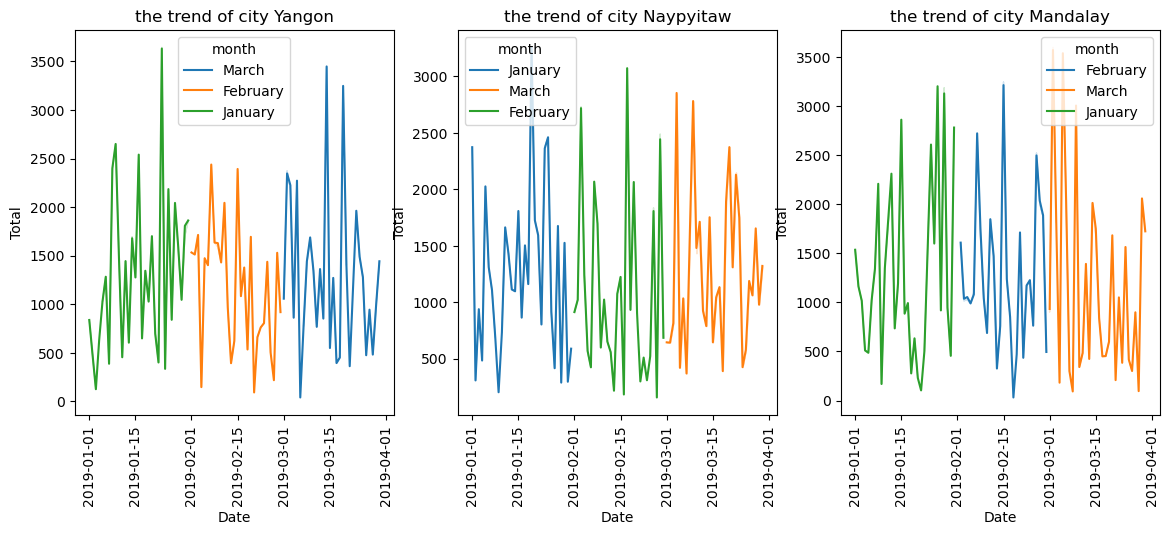

In [58]:
city_name=["Yangon", 'Naypyitaw', 'Mandalay']
pos=1
plt.figure(figsize=(14,5))
for city in cities:
    #print(city)
    plt.subplot(1,3,pos)
    sns.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False,hue="month")
    plt.title(f"the trend of city {city_name[pos-1]}")
    plt.xticks(rotation=90)
    pos=pos+1

## 2 hot selling day of the company

In [59]:
df.head(2)

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating,month,day_name,day,year,Hour
0,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,2024-05-06 13:08:00,Ewallet,9.1,January,Saturday,5,2019,0
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,2024-05-06 10:29:00,Cash,9.6,March,Friday,8,2019,0


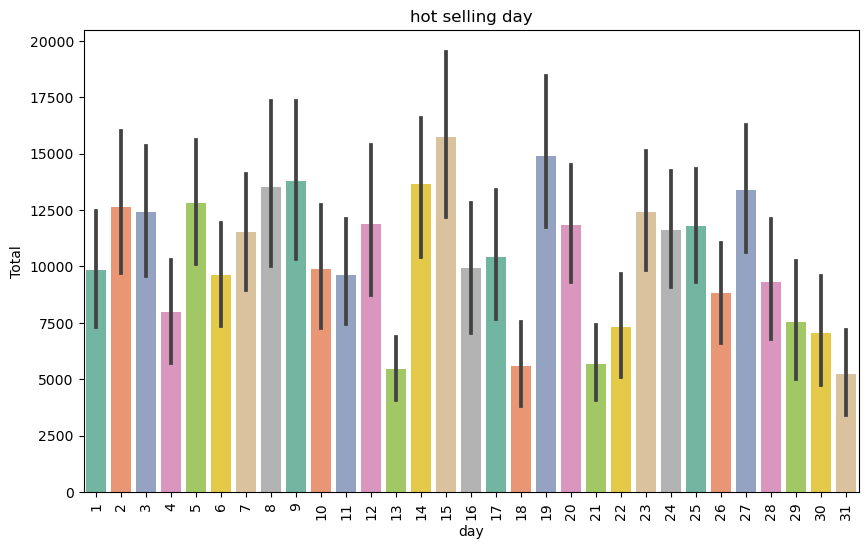

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x="day",y="Total",data=df,estimator=sum,palette="Set2")
plt.xticks(rotation=90)
plt.title("hot selling day");


## 3 hot selling day of each city

C:\Users\aman0\AppData\Local\Temp\ipykernel_584\1436774900.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x="day",y="Total",data=city,estimator=sum,ci=False)
C:\Users\aman0\AppData\Local\Temp\ipykernel_584\1436774900.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x="day",y="Total",data=city,estimator=sum,ci=False)
C:\Users\aman0\AppData\Local\Temp\ipykernel_584\1436774900.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x="day",y="Total",data=city,estimator=sum,ci=False)


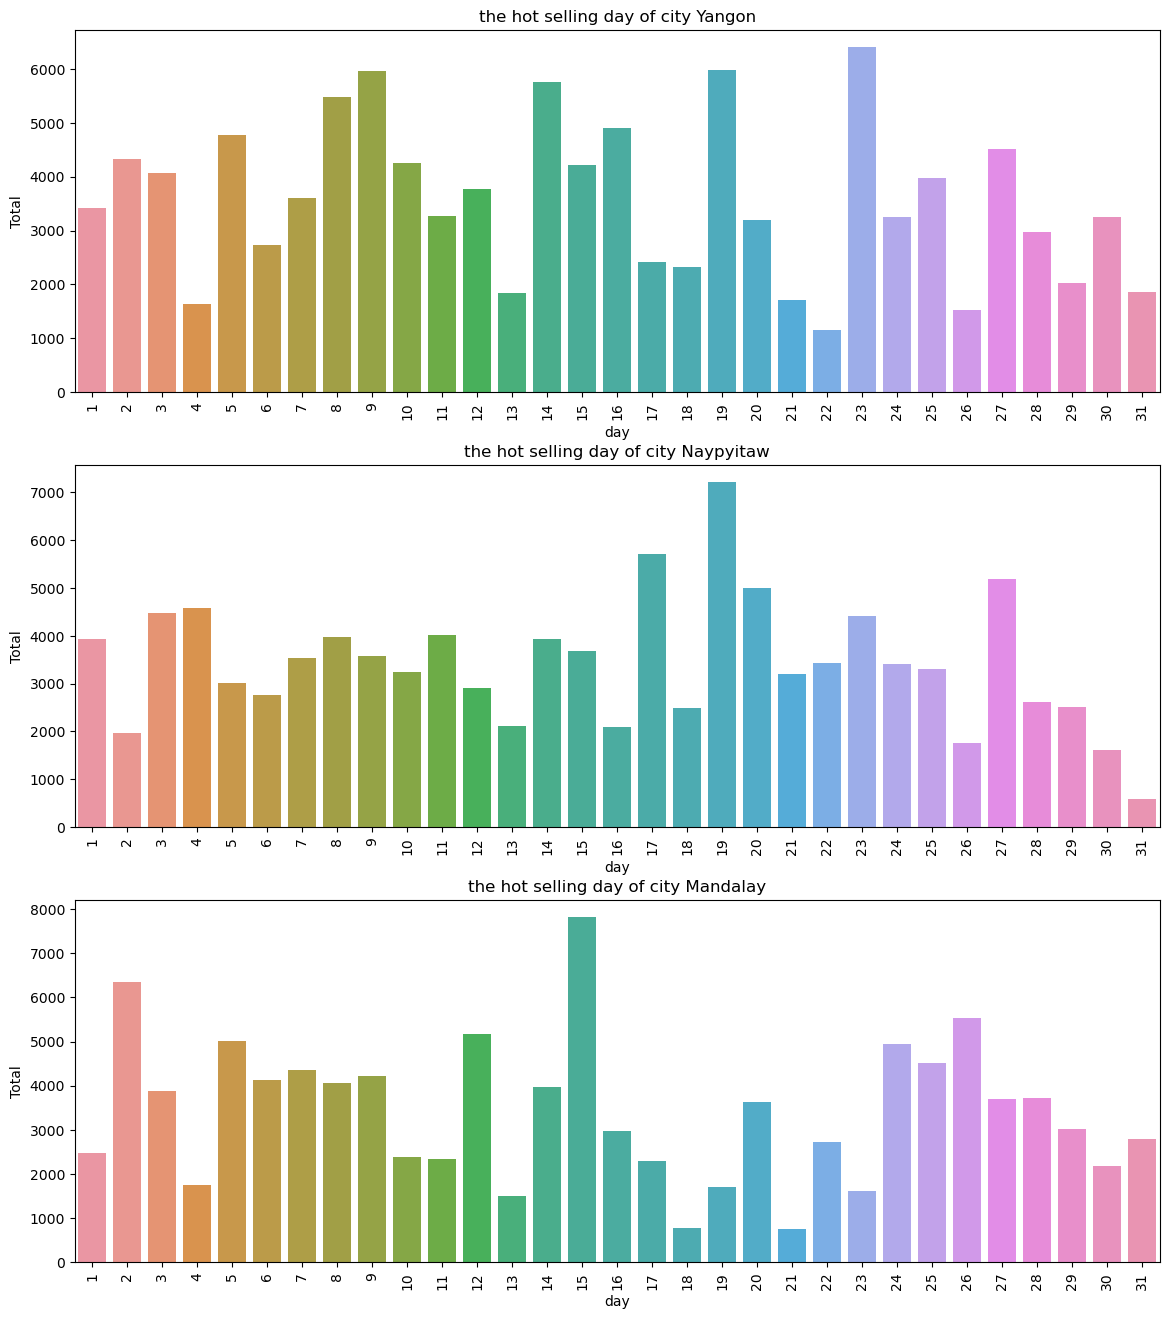

In [75]:
city_name=["Yangon", 'Naypyitaw', 'Mandalay']
pos=1
plt.figure(figsize=(14,16))
for city in cities:
    #print(city)
    plt.subplot(3,1,pos)
    sns.barplot(x="day",y="Total",data=city,estimator=sum,ci=False)
    plt.title(f"the hot selling day of city {city_name[pos-1]}")
    plt.xticks(rotation=90)
    pos=pos+1
    


 ## 4 find the total week day and weekend sale of the company

In [76]:
df["weekday/weeknd"]=df["day_name"].apply(lambda x: "weekend "if x=="Saturday" or x=="Sunday" else "weekday")

In [77]:
df.head(2)

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating,month,day_name,day,year,Hour,weekday/weeknd
0,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,2024-05-06 13:08:00,Ewallet,9.1,January,Saturday,5,2019,0,weekend
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,2024-05-06 10:29:00,Cash,9.6,March,Friday,8,2019,0,weekday


## find the most populated product of the company and city

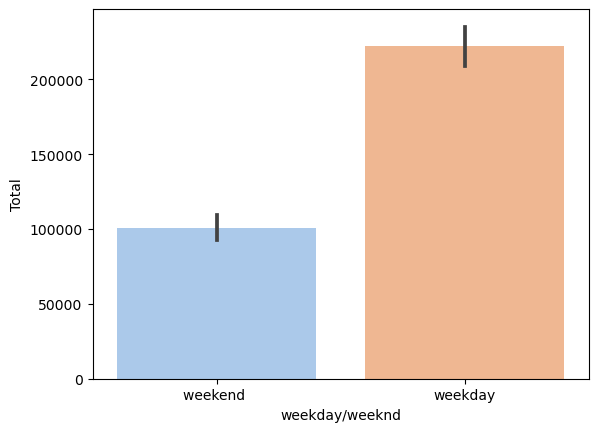

In [78]:
sns.barplot(x="weekday/weeknd",y="Total",data=df,estimator=sum,palette="pastel");



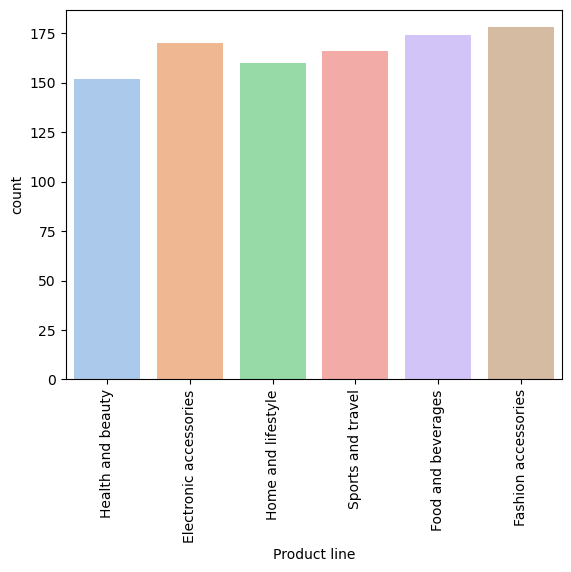

In [62]:
sns.countplot(x="Product line", data=df, palette="pastel")
plt.xticks(rotation=90);

In [79]:
print(df[df["weekday/weeknd"]=="weekday"]["Total"].sum().round(2))

222388.05


In [80]:
df[df["weekday/weeknd"]=="weekend "]["Total"].sum().round(2)


100578.7

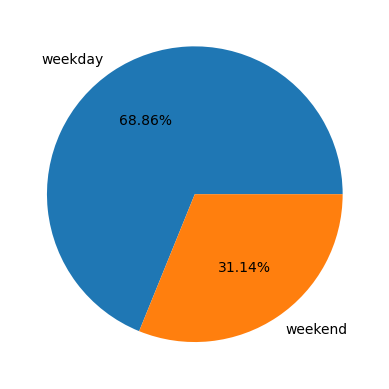

In [83]:
plt.pie([222388.05,100578.7],labels=["weekday","weekend"],autopct="%.2f%%");



<Axes: xlabel='City', ylabel='Total'>

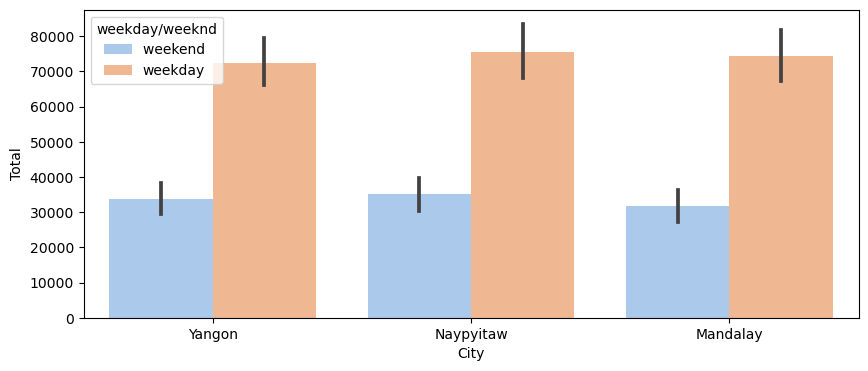

In [84]:
plt.figure(figsize=(10,4))
sns.barplot(x="City",y="Total",data=df,estimator=sum,palette="pastel",hue="weekday/weeknd")




In [86]:
df.groupby(["City","month","weekday/weeknd"])["Total"].agg(["sum"])



sum
City      month    weekday/weeknd            
Mandalay  February weekday         25964.4525
                   weekend          8459.8185
          January  weekday         27634.8870
                   weekend          9541.1715
          March    weekday         20898.5805
                   weekend         13698.7620
Naypyitaw February weekday         21950.5020
                   weekend         10984.4805
          January  weekday         30470.0550
                   weekend          9964.6260
          March    weekday         23041.4310
                   weekend         14157.6120
Yangon    February weekday         20417.2395
                   weekend          9442.8810
          January  weekday         25736.4870
                   weekend         12944.6415
          March    weekday         26274.4125
                   weekend         11384.7090

## find the most populated product of the  city

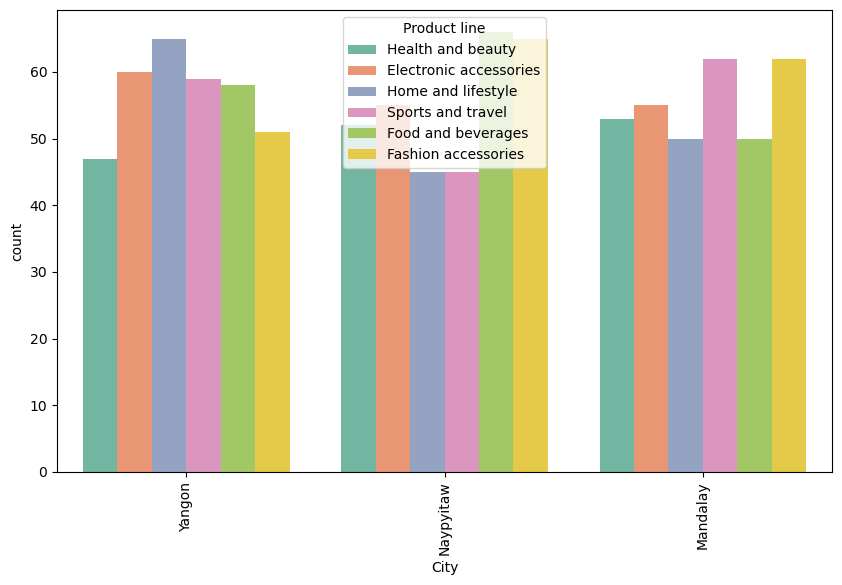

In [88]:
plt.figure(figsize=(10,6))
sns.countplot(x="City",data=df,hue="Product line",palette="Set2")
plt.xticks(rotation=90);




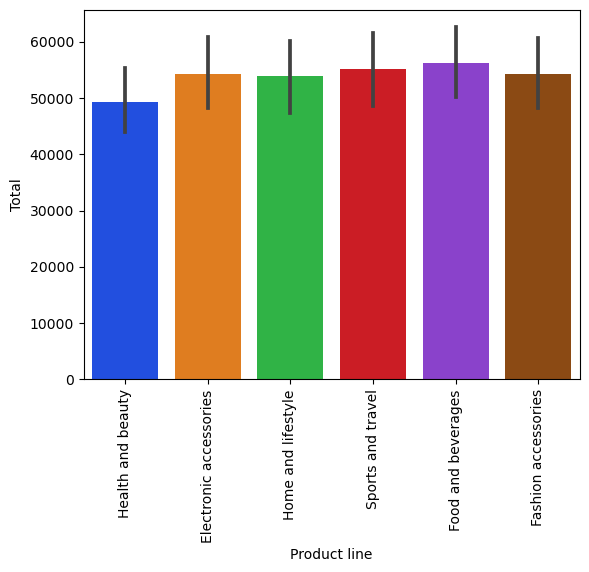

In [87]:
sns.barplot(x="Product line",y="Total",estimator= sum, data=df, palette="bright")
plt.xticks(rotation=90);

In [66]:
df.head(3)

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating,month,day_name,day,year,Hour
0,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,2024-05-06 13:08:00,Ewallet,9.1,January,Saturday,5,2019,0
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,2024-05-06 10:29:00,Cash,9.6,March,Friday,8,2019,0
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,2024-05-06 13:23:00,Credit card,7.4,March,Sunday,3,2019,0


In [70]:
df

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating,month,day_name,day,year,Hour
0,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,2024-05-06 13:08:00,Ewallet,9.1,January,Saturday,5,2019,0
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,2024-05-06 10:29:00,Cash,9.6,March,Friday,8,2019,0
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,2024-05-06 13:23:00,Credit card,7.4,March,Sunday,3,2019,0
3,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,2024-05-06 20:33:00,Ewallet,8.4,January,Sunday,27,2019,0
4,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,2024-05-06 10:37:00,Ewallet,5.3,February,Friday,8,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,2019-01-29,2024-05-06 13:46:00,Ewallet,6.2,January,Tuesday,29,2019,0
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.4900,2019-03-02,2024-05-06 17:16:00,Ewallet,4.4,March,Saturday,2,2019,0
997,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,2019-02-09,2024-05-06 13:22:00,Cash,7.7,February,Saturday,9,2019,0
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,2019-02-22,2024-05-06 15:33:00,Cash,4.1,February,Friday,22,2019,0


# find the city and month wise demand of each product

In [89]:
df.groupby(["City","month"])["Product line"].value_counts()


City       month     Product line          
Mandalay   February  Fashion accessories       24
                     Sports and travel         19
                     Electronic accessories    19
                     Food and beverages        17
                     Health and beauty         16
                     Home and lifestyle        14
           January   Sports and travel         23
                     Fashion accessories       21
                     Food and beverages        19
                     Electronic accessories    18
                     Health and beauty         16
                     Home and lifestyle        14
           March     Home and lifestyle        22
                     Health and beauty         21
                     Sports and travel         20
                     Electronic accessories    18
                     Fashion accessories       17
                     Food and beverages        14
Naypyitaw  February  Food and beverages        24
      

# find the monthly sale of each product of all the branches

In [90]:
df.groupby(["City","Product line","month"])["Total"].sum()

City       Product line            month   
Mandalay   Electronic accessories  February     6686.2530
                                   January      6699.7770
                                   March        3665.4135
           Fashion accessories     February     6137.1135
                                   January      6112.5960
                                   March        4163.6070
           Food and beverages      February     5554.8150
                                   January      6609.2775
                                   March        3050.7960
           Health and beauty       February     5856.4275
                                   January      6399.8865
                                   March        7724.3460
           Home and lifestyle      February     4659.8475
                                   January      4586.4420
                                   March        8302.8750
           Sports and travel       February     5529.8145
                            

# peak time of costumer visit at supermarket 

In [93]:
df.head(2)

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating,month,day_name,day,year,Hour,weekday/weeknd
0,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,2024-05-06 13:08:00,Ewallet,9.1,January,Saturday,5,2019,0,weekend
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,2024-05-06 10:29:00,Cash,9.6,March,Friday,8,2019,0,weekday


C:\Users\aman0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\aman0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1700x900 with 0 Axes>

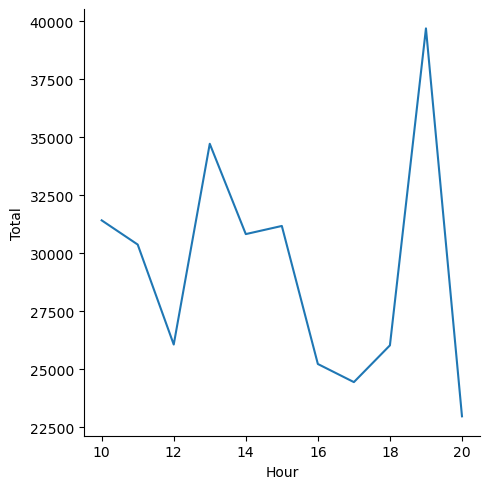

In [137]:
plt.figure(figsize=(17,9))
sns.relplot(x="Hour",y="Total",data=df,estimator=sum,kind="line",ci=None)


# peak time of each city

In [127]:
cities

[          City Customer type  Gender            Product line  Unit price  \
 1    Naypyitaw        Normal  Female  Electronic accessories       15.28   
 5    Naypyitaw        Normal    Male  Electronic accessories       85.39   
 7    Naypyitaw        Normal  Female      Home and lifestyle       73.56   
 20   Naypyitaw        Member    Male  Electronic accessories       86.04   
 34   Naypyitaw        Member  Female      Food and beverages       99.42   
 ..         ...           ...     ...                     ...         ...   
 983  Naypyitaw        Normal    Male       Health and beauty       99.96   
 984  Naypyitaw        Normal    Male  Electronic accessories       96.37   
 988  Naypyitaw        Member    Male  Electronic accessories       82.34   
 994  Naypyitaw        Member  Female  Electronic accessories       60.95   
 995  Naypyitaw        Normal    Male       Health and beauty       40.35   
 
      Quantity     Total       Date                Time  Payment  Rating  

C:\Users\aman0\AppData\Local\Temp\ipykernel_584\1087094376.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Hour",y="Total",data=city,estimator=sum,ci=False)
C:\Users\aman0\AppData\Local\Temp\ipykernel_584\1087094376.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Hour",y="Total",data=city,estimator=sum,ci=False)
C:\Users\aman0\AppData\Local\Temp\ipykernel_584\1087094376.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x="Hour",y="Total",data=city,estimator=sum,ci=False)


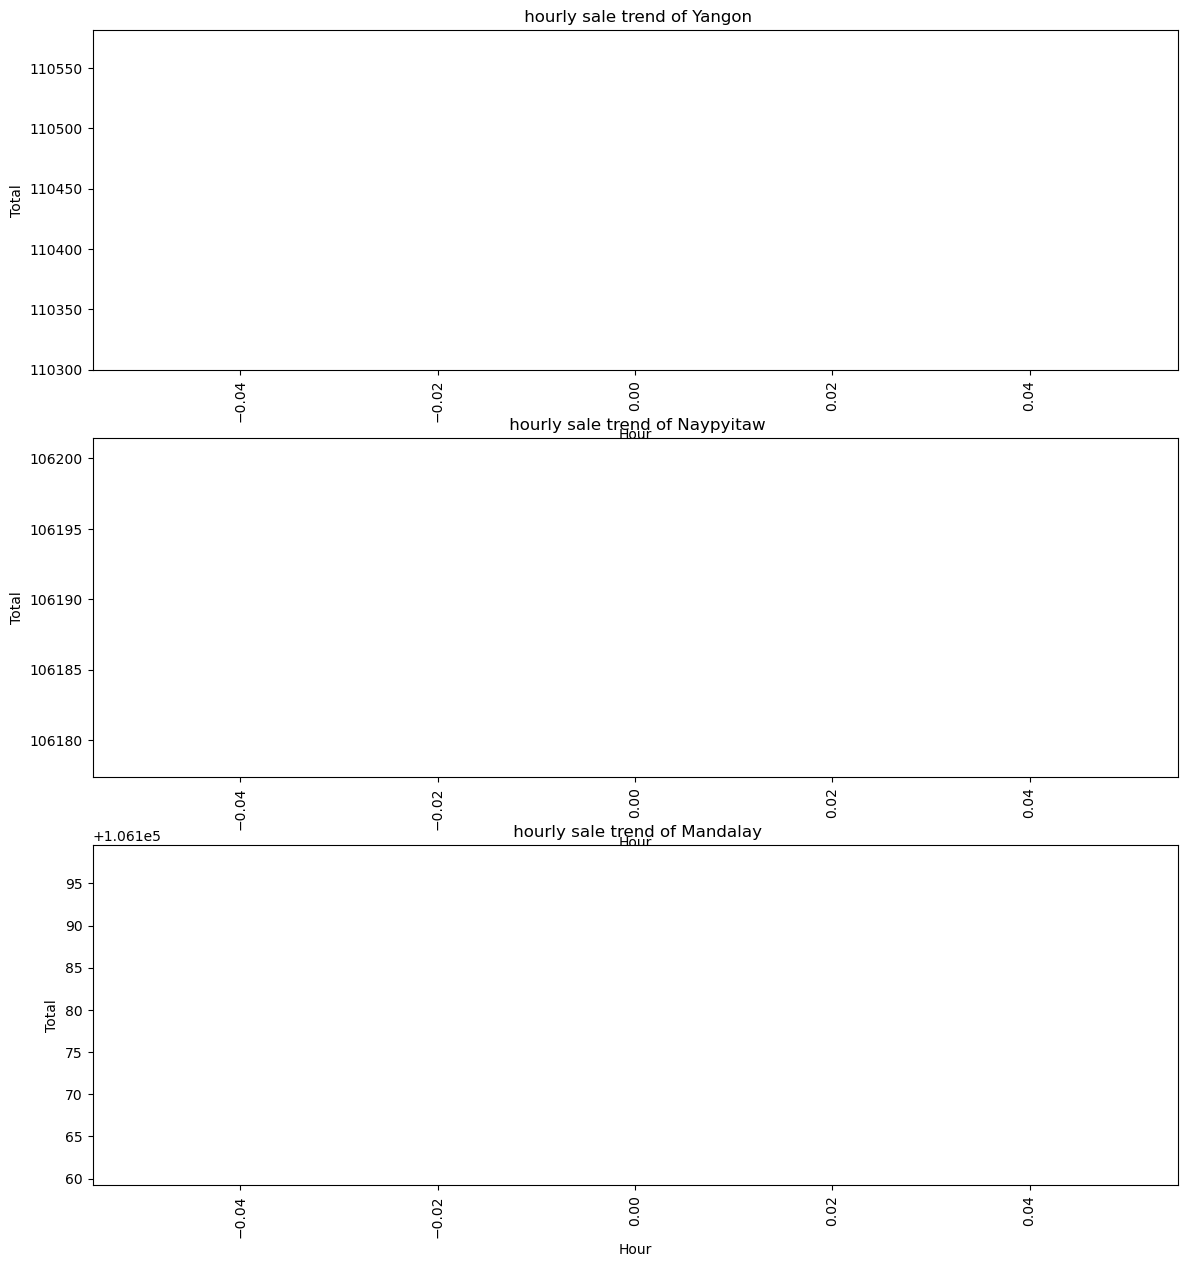

In [138]:
city_name=["Yangon", 'Naypyitaw', 'Mandalay']
pos=1
plt.figure(figsize=(14,15))
for city in cities:
    #print(city)
    plt.subplot(3,1,pos)
    sns.lineplot(x="Hour",y="Total",data=city,estimator=sum,ci=False)
    plt.title(f" hourly sale trend of {city_name[pos-1]}")
    plt.xticks(rotation=90)
    pos=pos+1



C:\Users\aman0\AppData\Local\Temp\ipykernel_584\2731642036.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Hour",y="Total",data=i,estimator=sum,ci=None,hue="Product line")
C:\Users\aman0\AppData\Local\Temp\ipykernel_584\2731642036.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Hour",y="Total",data=i,estimator=sum,ci=None,hue="Product line")
C:\Users\aman0\AppData\Local\Temp\ipykernel_584\2731642036.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Hour",y="Total",data=i,estimator=sum,ci=None,hue="Product line")


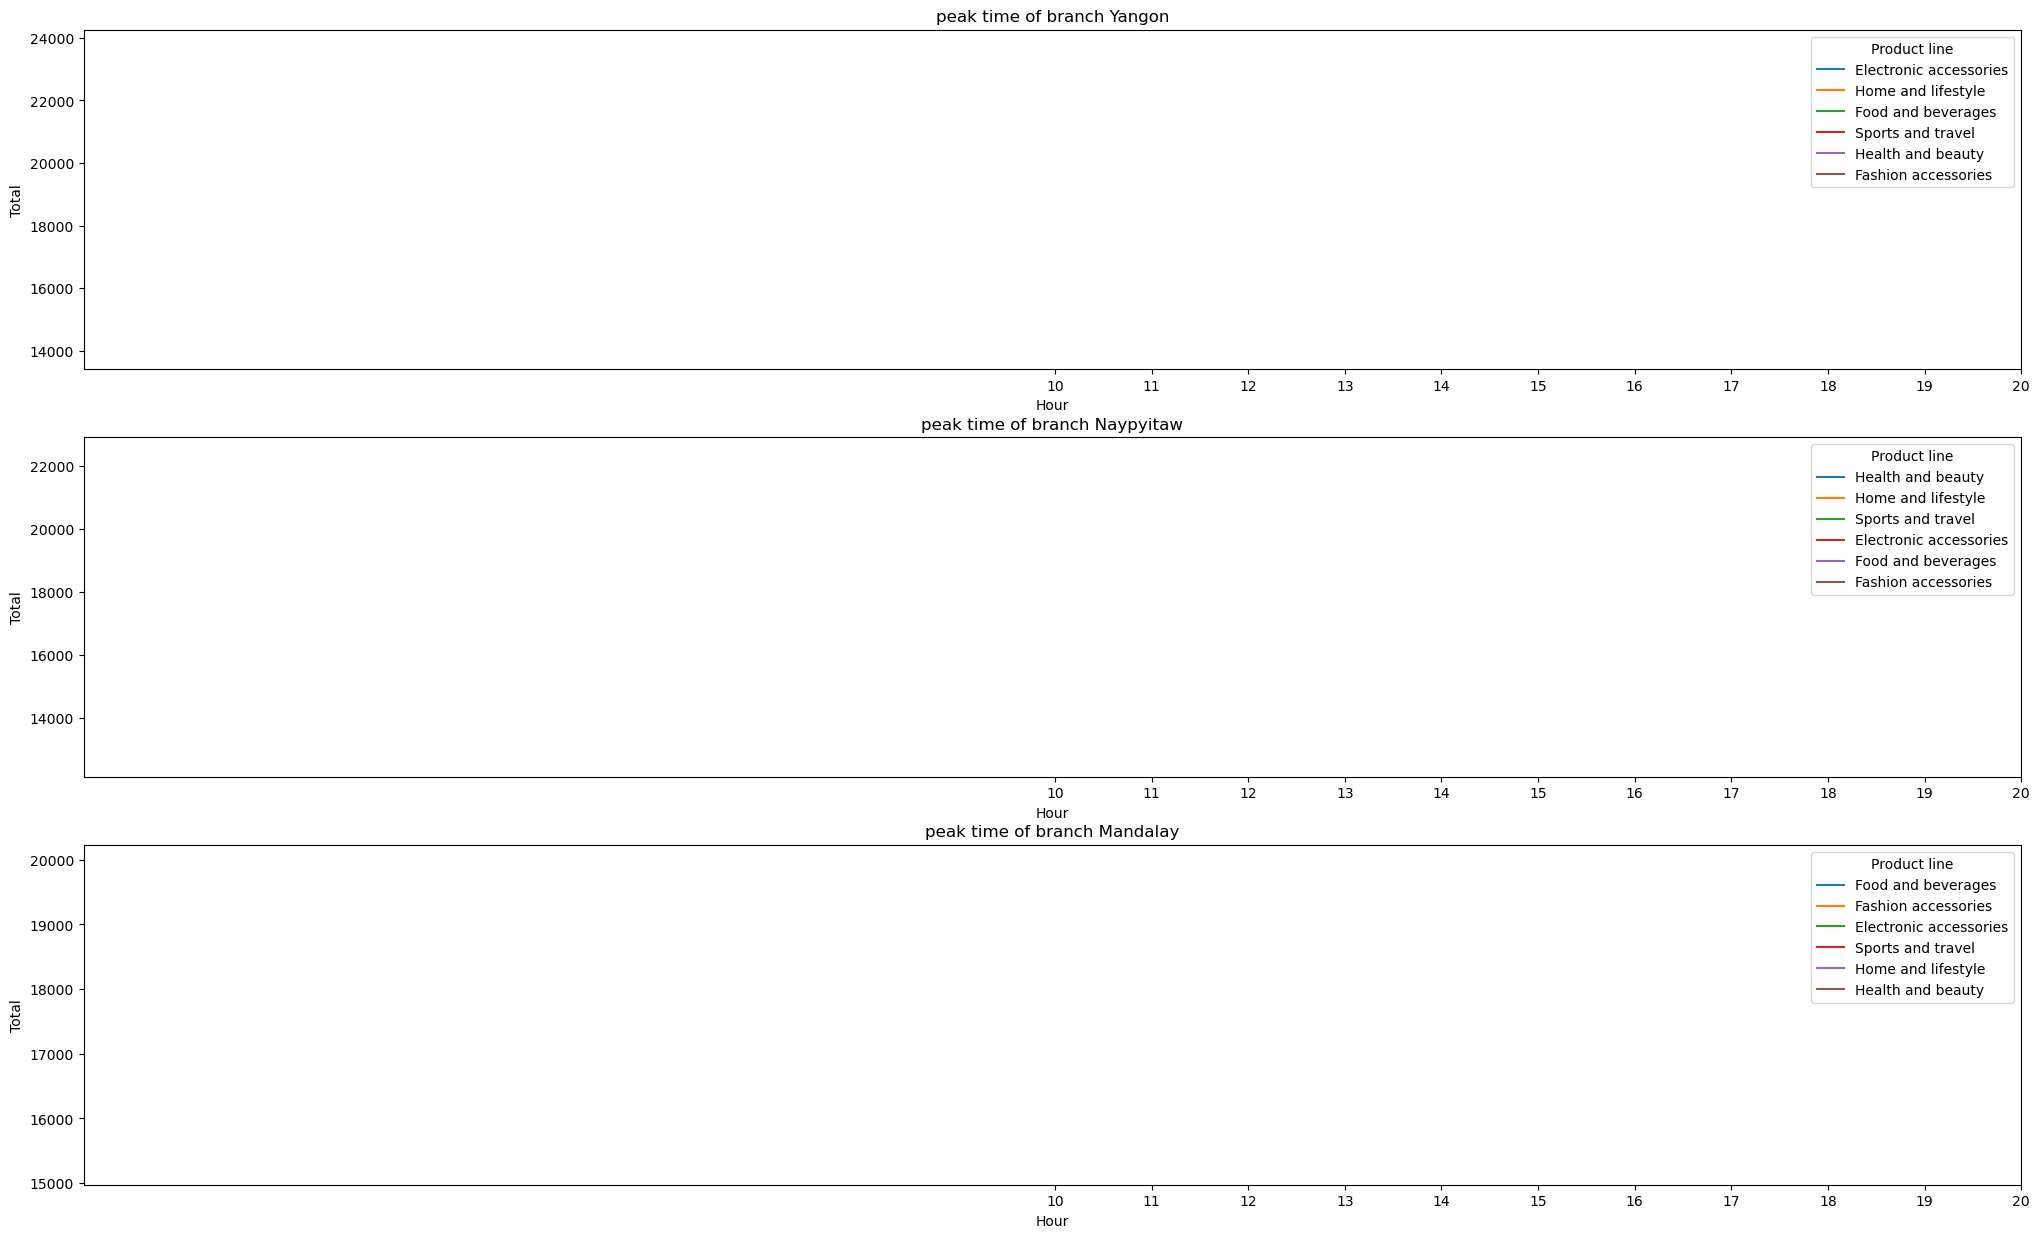

In [136]:
city=['Yangon', 'Naypyitaw', 'Mandalay']
pos=1
plt.figure(figsize=(25,15))
for i in cities:
    plt.subplot(3,1,pos)
    sns.lineplot(x="Hour",y="Total",data=i,estimator=sum,ci=None,hue="Product line")
    plt.title(f"peak time of branch {city[pos-1]}")
    plt.xticks(list(range(10,21)))
    pos=pos+1
    


# find the total number of customer

total customers :  1000


<Axes: xlabel='Gender', ylabel='count'>

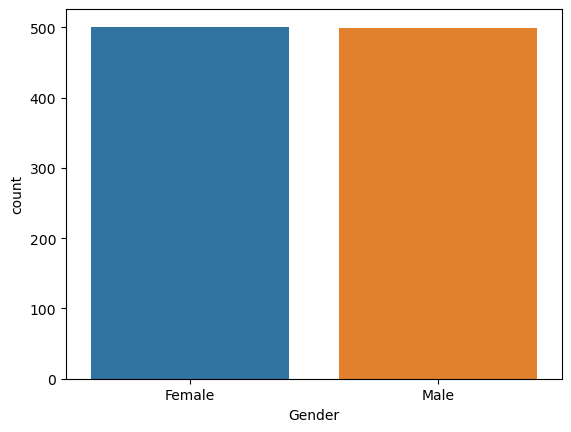

In [139]:
  print("total customers : ",df["Gender"].count())
sns.countplot(x="Gender",data=df)



# total male and female costumers in each city

<Axes: xlabel='City', ylabel='count'>

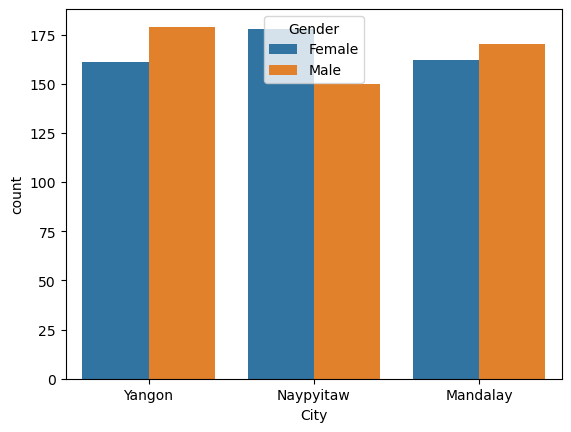

In [140]:
sns.countplot(x="City",data=df,hue="Gender")



# who contributed most in each city

<Axes: xlabel='City', ylabel='Total'>

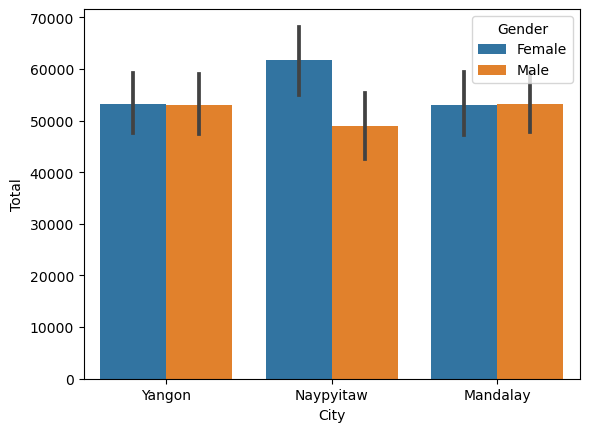

In [141]:
sns.barplot(x="City",y="Total",data=df,estimator=sum,hue="Gender")


# costumer type : which type of costumer is visiting most

<Axes: xlabel='City', ylabel='count'>

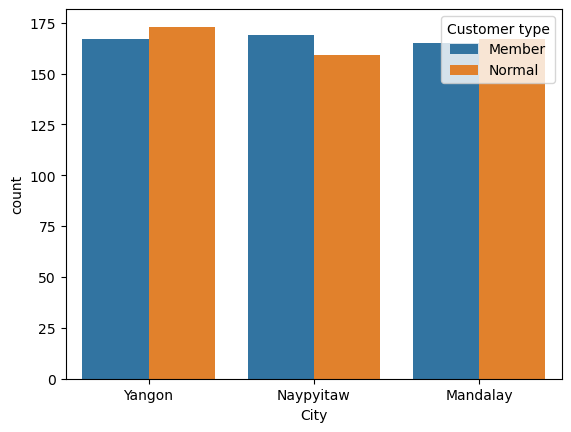

In [142]:
sns.countplot(x="City",data=df,hue="Customer type")


# from which costumer type the highest business is generated

<Axes: xlabel='City', ylabel='Total'>

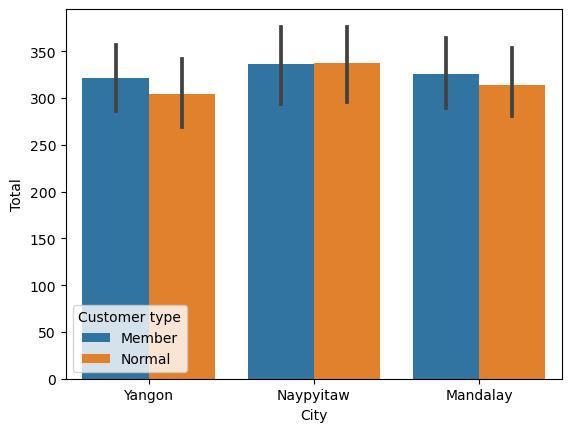

In [145]:
sns.barplot(x="City",y= "Total",data=df,hue="Customer type")

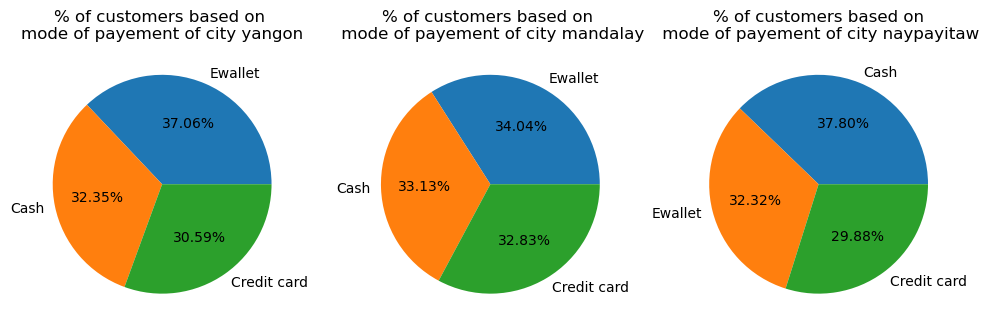

In [146]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.pie(df_y["Payment"].value_counts().values,labels=df_y["Payment"].value_counts().index,autopct="%.2f%%")
plt.title("% of customers based on \nmode of payement of city yangon")
plt.subplot(1,3,2)
plt.pie(df_m["Payment"].value_counts().values,labels=df_m["Payment"].value_counts().index,autopct="%.2f%%")
plt.title("% of customers based on \n mode of payement of city mandalay")
plt.subplot(1,3,3)
plt.pie(df_n["Payment"].value_counts().values,labels=df_n["Payment"].value_counts().index,autopct="%.2f%%")
plt.title("% of customers based on\n mode of payement of city naypayitaw");



# Rating

In [147]:
df["Rating"].agg(["max","min","mean"])


max     10.0000
min      4.0000
mean     6.9727
Name: Rating, dtype: float64

In [148]:
print(len(df[df["Rating"]==10.0]), "customers had given 10 rating")
print((len(df[df["Rating"]==10.0])*100)/df["Rating"].count(),"% customers had given 10 rating")


5 customers had given 10 rating
0.5 % customers had given 10 rating


In [149]:
print(len(df[df["Rating"]==4.0]), "customers had given 4 rating")
print((len(df[df["Rating"]==4.0])*100)/df["Rating"].count(),"% customers had given 4 rating")

11 customers had given 4 rating
1.1 % customers had given 4 rating


In [150]:
print(len(df[df["Rating"]<=5.0]), "customers had given below rating")
print((len(df[df["Rating"]<=5.0])*100)/df["Rating"].count(),"% customers had given below 5 rating")


174 customers had given below rating
17.4 % customers had given below 5 rating


In [151]:
print(len(df[df["Rating"]>=5.0]), "customers had given above rating")
print((len(df[df["Rating"]>=5.0])*100)/df["Rating"].count(),"% customers had given above 5 rating")


847 customers had given above rating
84.7 % customers had given above 5 rating


In [ ]:
df.groupby([])